<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLP_vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tokenization is the first step in natural language processing (NLP) projects. It involves dividing a text into individual units, known as tokens. Tokens can be words or punctuation marks. These tokens are then transformed into numerical vectors representing words. Two main concepts are vectorization and embedding. Text Vectorization is the process of turning words into numerical vectors in a one-dimensional space. Word Embedding (Word Vector) is a type of vectorization through deep learning as dense vectors in a high-dimensional space.
- Text Vectorization
  - Traditional approach
    - One-Hot Encoding
    - Bag of Words
    - CountVectorizer
    - TF-IDF
      
- Word Embedding
  - Neural Word Embedding
      - Word2Vec
      - Skip-Gram
      - CBOW
  - Pretrained Word-Embedding
    - GloVe
    - FastText
    - BERT

- Document embedding
  - Doc2Vec
    - Distributed Memory (DM)
    - Distributed Bag of Words (DBOW)

#Text Vectorization

Notes:
- To represent sentences in the form of real-valued vectors, the length of these vectors should be the same for comparison. In this case, a list including unique words will be needed for reference. The vector's length equals the number of words in the word list, and the values of these words will be the frequency of their apparition in sentences. Besides, to reduce the size of the dictionary (punctions, acronyms, tenses, forms...) => the first is to preprocess and normalize all sentences in the corpus.

##One-Hot Encoding <Br>
represent categorical variables as numerical values in a machine learning model


In [ ]:
sentence = 'The cat sat on the mat.'
# Create a vocabulary set
vocab = set()
words = sentence.lower().split()
for word in words:
  vocab.add(word)
print(f'Vocabulary list: {vocab}')

# Create a dictionary to map words to integers
word_to_int = {word: i for i, word in enumerate(vocab)}
print(f'Vocabulary dictionary: {word_to_int}')

# Create a binary vector for each word
import numpy as np
sentence_vectors = []
words = sentence.lower().split()
for word in words:
  binary_vector = np.zeros(len(vocab))
  binary_vector[word_to_int[word]] = 1
  sentence_vectors.append(binary_vector)
  print(f'{word}: {binary_vector}')
print(f'Sentence vector: {np.array(sentence_vectors)}')

Vocabulary list: {'mat.', 'on', 'cat', 'sat', 'the'}
Vocabulary dictionary: {'mat.': 0, 'on': 1, 'cat': 2, 'sat': 3, 'the': 4}
the: [0. 0. 0. 0. 1.]
cat: [0. 0. 1. 0. 0.]
sat: [0. 0. 0. 1. 0.]
on: [0. 1. 0. 0. 0.]
the: [0. 0. 0. 0. 1.]
mat.: [1. 0. 0. 0. 0.]
Sentence vector: [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [ ]:
sentences = ['The cat sat on the mat.',
             'The dog chased the cat.',
             'The mat was soft and fluffy.']

# Create a vocabulary set
vocab = set()
for sentence in sentences:
	words = sentence.lower().split()
	for word in words:
		vocab.add(word)
print(f'Vocabulary list: {vocab}')

# Create a dictionary to map words to integers
word_to_int = {word: i for i, word in enumerate(vocab)}
print(f'Vocabulary dictionary: {word_to_int}')

# Create a binary vector for each word in each sentence
import numpy as np
vectors = []
for sentence in sentences:
  sentence_vectors = []
  words = sentence.lower().split()
  for word in words:
    binary_vector = np.zeros(len(vocab))
    binary_vector[word_to_int[word]] = 1
    print(f"{word}: {binary_vector}")
    sentence_vectors.append(binary_vector)
  vectors.append(np.array(sentence_vectors))
  print(f"==> {sentence}: {np.array(sentence_vectors)}")
print(f'Sentence vector: {vectors}')

Vocabulary list: {'dog', 'fluffy.', 'mat.', 'chased', 'on', 'mat', 'soft', 'cat', 'cat.', 'was', 'and', 'sat', 'the'}
Vocabulary dictionary: {'dog': 0, 'fluffy.': 1, 'mat.': 2, 'chased': 3, 'on': 4, 'mat': 5, 'soft': 6, 'cat': 7, 'cat.': 8, 'was': 9, 'and': 10, 'sat': 11, 'the': 12}
the: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
cat: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
sat: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
on: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
the: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
mat.: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
==> The cat sat on the mat.: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
the: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
dog: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
chased: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
the: [0. 0. 0. 0.

##CountVectorizer <Br>
transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. <Br>
<Br>
CountVectorizer().transform(given text)
- Step 1: takes a collection of text documents (tokenization)
- Step 2: creates a matrix of token counts

In [ ]:
sentence = 'The cat sat on the mat.'

#spliting sentence into unique words along with their indices
from collections import defaultdict
word_list = sentence.lower().split()
word_dict = dict(zip(set(word_list), range(len(set(word_list)))))
print("Vocabulary: ", word_dict)

#frequency (count) of each word in the sentence
word_freq = defaultdict(int)
for word in word_list:
  word_freq[word] += 1
print(f'Word_prequency: {word_freq}')

#Encoding the sentence
import numpy as np
freq_vector = np.zeros(len(word_dict))
for word in word_dict:
  freq_vector[word_dict[word]] = word_freq[word]
print(f'Sentence: {sentence} => Sentence vector: {freq_vector}')

Vocabulary:  {'cat': 0, 'on': 1, 'sat': 2, 'the': 3, 'mat.': 4}
Word_prequency: defaultdict(<class 'int'>, {'the': 2, 'cat': 1, 'sat': 1, 'on': 1, 'mat.': 1})
Sentence: The cat sat on the mat. => Sentence vector: [1. 1. 1. 2. 1.]


In [ ]:
sentences = ['The cat sat on the mat.',
             'The dog chased the cat.',
             'The mat was soft and fluffy.']

from sklearn.feature_extraction.text import CountVectorizer
# Create a Vectorizer Object
vectorizer = CountVectorizer()
vectorizer.fit(sentences)

# Printing the identified Unique words along with their indices
sorted_dict = dict(sorted(vectorizer.vocabulary_.items()))
print("Vocabulary: ", sorted_dict)

# Encode the Document
vector = vectorizer.transform(sentences)

# Summarizing the Encoded Texts
import pandas as pd
print(type(vector))
pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names_out(), index = sentences)

Vocabulary:  {'and': 0, 'cat': 1, 'chased': 2, 'dog': 3, 'fluffy': 4, 'mat': 5, 'on': 6, 'sat': 7, 'soft': 8, 'the': 9, 'was': 10}
<class 'scipy.sparse._csr.csr_matrix'>


,and,cat,chased,dog,fluffy,mat,on,sat,soft,the,was
The cat sat on the mat.,0,1,0,0,0,1,1,1,0,2,0
The dog chased the cat.,0,1,1,1,0,0,0,0,0,2,0
The mat was soft and fluffy.,1,0,0,0,1,1,0,0,1,1,1


In [ ]:
# Summarizing the Encoded Texts
print("Encoded Document is:")
for sent, vec in zip(sentences, vector.toarray()):
  print(f'Sentence: {sent} => Sentence vector: {vec}')

Encoded Document is:
Sentence: The cat sat on the mat. => Sentence vector: [0 1 0 0 0 1 1 1 0 2 0]
Sentence: The dog chased the cat. => Sentence vector: [0 1 1 1 0 0 0 0 0 2 0]
Sentence: The mat was soft and fluffy. => Sentence vector: [1 0 0 0 1 1 0 0 1 1 1]


##Bag of Words

Extracts features from the text
- Construct a word list includes all unique words in a corpus
- Vectorize all sentences in a corpus using the word list

In [ ]:
# A corpus of sentences.
corpus = [
  "Red Bull drops hint on F1 engine.",
  "Honda exits F1, leaving F1 partner Red Bull.",
  "Hamilton eyes record eighth F1 title.",
  "Aston Martin announces sponsor."
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

# View features (tokens).
print('Tokens: ', vectorizer.get_feature_names_out())

# View vocabulary dictionary.
print("Vocabulary: ", vectorizer.vocabulary_)

# Summarizing the Encoded Texts
import pandas as pd
print(type(bow))
pd.DataFrame(bow.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus)

Tokens:  ['announces' 'aston' 'bull' 'drops' 'eighth' 'engine' 'exits' 'eyes' 'f1'
 'hamilton' 'hint' 'honda' 'leaving' 'martin' 'on' 'partner' 'record'
 'red' 'sponsor' 'title']
Vocabulary:  {'red': 17, 'bull': 2, 'drops': 3, 'hint': 10, 'on': 14, 'f1': 8, 'engine': 5, 'honda': 11, 'exits': 6, 'leaving': 12, 'partner': 15, 'hamilton': 9, 'eyes': 7, 'record': 16, 'eighth': 4, 'title': 19, 'aston': 1, 'martin': 13, 'announces': 0, 'sponsor': 18}
<class 'scipy.sparse._csr.csr_matrix'>


,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
Red Bull drops hint on F1 engine.,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
"Honda exits F1, leaving F1 partner Red Bull.",0,0,1,0,0,0,1,0,2,0,0,1,1,0,0,1,0,1,0,0
Hamilton eyes record eighth F1 title.,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1
Aston Martin announces sponsor.,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


###Binary BOW with custom tokenizer (spacy_tokenizer)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a tokenizer callback using spaCy under the hood. Here, we tokenize
# the passed-in text and return the tokens, filtering out punctuation.
def spacy_tokenizer(doc):
  return [t.text for t in nlp(doc) if not t.is_punct]

#binary = True <=> One-Hot Encoding (0s, 1s), binary=False <=> CountVectorizer (frequency)
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, token_pattern=None, lowercase=False, binary=True)
bow = vectorizer.fit_transform(corpus)

# View features (tokens).
print('Tokens: ', vectorizer.get_feature_names_out())

# View vocabulary dictionary.
print("Vocabulary: ", vectorizer.vocabulary_)

# Summarizing the Encoded Texts
import pandas as pd
print(type(bow))
pd.DataFrame(bow.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus)

Tokens:  ['Aston' 'Bull' 'F1' 'Hamilton' 'Honda' 'Martin' 'Red' 'announces' 'drops'
 'eighth' 'engine' 'exits' 'eyes' 'hint' 'leaving' 'on' 'partner' 'record'
 'sponsor' 'title']
Vocabulary:  {'Red': 6, 'Bull': 1, 'drops': 8, 'hint': 13, 'on': 15, 'F1': 2, 'engine': 10, 'Honda': 4, 'exits': 11, 'leaving': 14, 'partner': 16, 'Hamilton': 3, 'eyes': 12, 'record': 17, 'eighth': 9, 'title': 19, 'Aston': 0, 'Martin': 5, 'announces': 7, 'sponsor': 18}
<class 'scipy.sparse._csr.csr_matrix'>


,Aston,Bull,F1,Hamilton,Honda,Martin,Red,announces,drops,eighth,engine,exits,eyes,hint,leaving,on,partner,record,sponsor,title
Red Bull drops hint on F1 engine.,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0
"Honda exits F1, leaving F1 partner Red Bull.",0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
Hamilton eyes record eighth F1 title.,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
Aston Martin announces sponsor.,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


###N-grams <Br>
for capturing some context <Br>
n_gram range is specified using a minimum and maximum range. By default, n_gram range is set to (1, 1) which generates unigrams. Setting it to (1, 2) generates both unigrams and bigrams.

In [ ]:
import string
def get_unigram(corpus):
  tokens = []
  for sent in corpus:
    for punc in string.punctuation:
      sent = sent.replace(punc, '')
    tokens+=sent.split()
  return list(set(tokens))

def get_bigram(corpus):
  tokens = []
  for sent in corpus:
    for punc in string.punctuation:
      sent = sent.replace(punc, '')
    for pos in range(len(sent.split())-1):
      bi_gram = ' '.join(sent.split()[pos:pos+2])
      if bi_gram not in tokens:
        tokens.append(bi_gram)
  return tokens

def text_tokenize(text):
  tokens = []
  for punc in string.punctuation:
    text = text.replace(punc, '')
  for pos in range(len(text.split())):
    uni_gram = text.split()[pos]
    tokens.append(uni_gram)
    bi_gram = text.split()[pos:pos+2]
    if len(bi_gram) > 1:
      tokens.append(' '.join(bi_gram))
  return tokens

def vectorizer(corpus):
  tokens = get_unigram(corpus) + get_bigram(corpus)
  tokens.sort()
  corpus_vec = []
  for sent in corpus:
    sent_token = text_tokenize(sent)
    sent_vec = [1 if t in sent_token else 0 for t in tokens]
    corpus_vec.append(sent_vec)
  return corpus_vec

# View features (tokens).
tokens = get_unigram(corpus) + get_bigram(corpus)
tokens.sort()
print('Token length: ', len(tokens))
print('Tokens: ', tokens)

# View vocabulary dictionary.
print('Vocabulary length: ', len(dict(zip(tokens, range(len(tokens))))))
print("Vocabulary: ", dict(zip(tokens, range(len(tokens)))))

# Summarizing the Encoded Texts
import pandas as pd
import numpy as np
pd.DataFrame(np.array(vectorizer(corpus)), columns = tokens, index = corpus)

Token length:  40
Tokens:  ['Aston', 'Aston Martin', 'Bull', 'Bull drops', 'F1', 'F1 engine', 'F1 leaving', 'F1 partner', 'F1 title', 'Hamilton', 'Hamilton eyes', 'Honda', 'Honda exits', 'Martin', 'Martin announces', 'Red', 'Red Bull', 'announces', 'announces sponsor', 'drops', 'drops hint', 'eighth', 'eighth F1', 'engine', 'exits', 'exits F1', 'eyes', 'eyes record', 'hint', 'hint on', 'leaving', 'leaving F1', 'on', 'on F1', 'partner', 'partner Red', 'record', 'record eighth', 'sponsor', 'title']
Vocabulary length:  40
Vocabulary:  {'Aston': 0, 'Aston Martin': 1, 'Bull': 2, 'Bull drops': 3, 'F1': 4, 'F1 engine': 5, 'F1 leaving': 6, 'F1 partner': 7, 'F1 title': 8, 'Hamilton': 9, 'Hamilton eyes': 10, 'Honda': 11, 'Honda exits': 12, 'Martin': 13, 'Martin announces': 14, 'Red': 15, 'Red Bull': 16, 'announces': 17, 'announces sponsor': 18, 'drops': 19, 'drops hint': 20, 'eighth': 21, 'eighth F1': 22, 'engine': 23, 'exits': 24, 'exits F1': 25, 'eyes': 26, 'eyes record': 27, 'hint': 28, 'hint

,Aston,Aston Martin,Bull,Bull drops,F1,F1 engine,F1 leaving,F1 partner,F1 title,Hamilton,...,leaving,leaving F1,on,on F1,partner,partner Red,record,record eighth,sponsor,title
Red Bull drops hint on F1 engine.,0,0,1,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
"Honda exits F1, leaving F1 partner Red Bull.",0,0,1,0,1,0,1,1,0,0,...,1,1,0,0,1,1,0,0,0,0
Hamilton eyes record eighth F1 title.,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,1
Aston Martin announces sponsor.,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Create a tokenizer callback using spaCy under the hood. Here, we tokenize
# the passed-in text and return the tokens, filtering out punctuation.
import spacy
nlp = spacy.load('en_core_web_sm')
def spacy_tokenizer(doc):
  return [t.text for t in nlp(doc) if not t.is_punct]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, token_pattern=None, lowercase=False, binary=True, ngram_range=(1,2))
bigrams = vectorizer.fit_transform(corpus)

# View features (tokens).
print('Token length: ', len(vectorizer.get_feature_names_out()))
print('Tokens: ', vectorizer.get_feature_names_out())

# View vocabulary dictionary.
print('Vocabulary length: ', len(vectorizer.vocabulary_))
print("Vocabulary: ", vectorizer.vocabulary_)

# Summarizing the Encoded Texts
import pandas as pd
print(type(bigrams))
pd.DataFrame(bigrams.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus)

Token length:  40
Tokens:  ['Aston' 'Aston Martin' 'Bull' 'Bull drops' 'F1' 'F1 engine' 'F1 leaving'
 'F1 partner' 'F1 title' 'Hamilton' 'Hamilton eyes' 'Honda' 'Honda exits'
 'Martin' 'Martin announces' 'Red' 'Red Bull' 'announces'
 'announces sponsor' 'drops' 'drops hint' 'eighth' 'eighth F1' 'engine'
 'exits' 'exits F1' 'eyes' 'eyes record' 'hint' 'hint on' 'leaving'
 'leaving F1' 'on' 'on F1' 'partner' 'partner Red' 'record'
 'record eighth' 'sponsor' 'title']
Vocabulary length:  40
Vocabulary:  {'Red': 15, 'Bull': 2, 'drops': 19, 'hint': 28, 'on': 32, 'F1': 4, 'engine': 23, 'Red Bull': 16, 'Bull drops': 3, 'drops hint': 20, 'hint on': 29, 'on F1': 33, 'F1 engine': 5, 'Honda': 11, 'exits': 24, 'leaving': 30, 'partner': 34, 'Honda exits': 12, 'exits F1': 25, 'F1 leaving': 6, 'leaving F1': 31, 'F1 partner': 7, 'partner Red': 35, 'Hamilton': 9, 'eyes': 26, 'record': 36, 'eighth': 21, 'title': 39, 'Hamilton eyes': 10, 'eyes record': 27, 'record eighth': 37, 'eighth F1': 22, 'F1 title':

,Aston,Aston Martin,Bull,Bull drops,F1,F1 engine,F1 leaving,F1 partner,F1 title,Hamilton,...,leaving,leaving F1,on,on F1,partner,partner Red,record,record eighth,sponsor,title
Red Bull drops hint on F1 engine.,0,0,1,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
"Honda exits F1, leaving F1 partner Red Bull.",0,0,1,0,1,0,1,1,0,0,...,1,1,0,0,1,1,0,0,0,0
Hamilton eyes record eighth F1 title.,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,1
Aston Martin announces sponsor.,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Setting n_gram range to (2, 2) generates only bigrams.

# Create a tokenizer callback using spaCy under the hood. Here, we tokenize
# the passed-in text and return the tokens, filtering out punctuation.
import spacy
nlp = spacy.load('en_core_web_sm')
def spacy_tokenizer(doc):
  return [t.text for t in nlp(doc) if not t.is_punct]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, token_pattern=None, lowercase=False, binary=True, ngram_range=(2,2))
bigrams = vectorizer.fit_transform(corpus)

# View features (tokens).
print('Token length: ', len(vectorizer.get_feature_names_out()))
print('Tokens: ', vectorizer.get_feature_names_out())

# View vocabulary dictionary.
print('Vocabulary length: ', len(vectorizer.vocabulary_))
print("Vocabulary: ", vectorizer.vocabulary_)

# Summarizing the Encoded Texts
import pandas as pd
print(type(bigrams))
pd.DataFrame(bigrams.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus)

Token length:  20
Tokens:  ['Aston Martin' 'Bull drops' 'F1 engine' 'F1 leaving' 'F1 partner'
 'F1 title' 'Hamilton eyes' 'Honda exits' 'Martin announces' 'Red Bull'
 'announces sponsor' 'drops hint' 'eighth F1' 'exits F1' 'eyes record'
 'hint on' 'leaving F1' 'on F1' 'partner Red' 'record eighth']
Vocabulary length:  20
Vocabulary:  {'Red Bull': 9, 'Bull drops': 1, 'drops hint': 11, 'hint on': 15, 'on F1': 17, 'F1 engine': 2, 'Honda exits': 7, 'exits F1': 13, 'F1 leaving': 3, 'leaving F1': 16, 'F1 partner': 4, 'partner Red': 18, 'Hamilton eyes': 6, 'eyes record': 14, 'record eighth': 19, 'eighth F1': 12, 'F1 title': 5, 'Aston Martin': 0, 'Martin announces': 8, 'announces sponsor': 10}
<class 'scipy.sparse._csr.csr_matrix'>


,Aston Martin,Bull drops,F1 engine,F1 leaving,F1 partner,F1 title,Hamilton eyes,Honda exits,Martin announces,Red Bull,announces sponsor,drops hint,eighth F1,exits F1,eyes record,hint on,leaving F1,on F1,partner Red,record eighth
Red Bull drops hint on F1 engine.,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
"Honda exits F1, leaving F1 partner Red Bull.",0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
Hamilton eyes record eighth F1 title.,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1
Aston Martin announces sponsor.,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


###Cosine Similarity

Cosine Similarity $=cos(θ) = \frac{A.B}{||A||\text{ }||B||} = \frac{∑^n_{i=1}A_iB_i}{∑^n_{i=1}A^2_i∑^n_{i=1}B^2_i} $

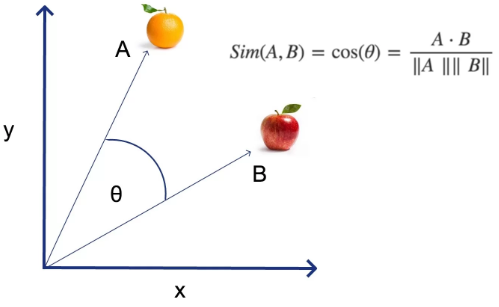

In [ ]:
from numpy.linalg import norm
doc1 = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
doc2 = [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
#Cosine Similarity between 'Red Bull drops hint on F1 engine.' vs 'Honda exits F1, leaving F1 partner Red Bull.'
np.dot(doc1, doc2)/(norm(doc1)*norm(doc2))

0.4285714285714285

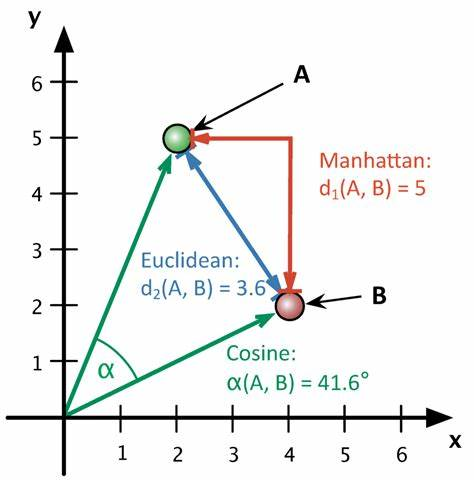

##TF-IDF

Given a word and n documents (a corpus) <Br>
- If a word occurs frequently in one or few documents but not in the rest, it's likely meaningful for those documents and should be considered more "important"
- But if that word occurs frequently across the corpus, then it should be considered less "important" and meaningful.












$tf-idf_{t,d} = \text{Term Frequency}_{t,d} × \text{Inverse Document Frequency}_{t}$

$\text{Term Frequency}_{t,d} = \frac{\text{Term (t) frequency in document d}}{\text{Total number of terms in document d}}$

$\text{Inverse Document Frequency}_{t} = log(\frac{\text{Total documents in corpus N}}{\text{Number of documents in corpus contain term (t)}})$

In [1]:
#A Little Language - ROBERT DUNCAN
document = [
    'I know a little language of my cat, though Dante says that animals have no need of speech and Nature abhors the superfluous.',
    'My cat is fluent.',
    'He converses when he wants with me.',
    'To speak is natural.',
    "And whales and wolves I've heard in choral soundings of the sea and air know harmony and have an eloquence that stirs my mind and heart—they touch the soul.",
    "Here Dante's religion that would set Man apart damns the effluence of our life from us to build therein its powerhouse.",
    "It's in his animal communication Man is true, immediate, and in immediacy, Man is all animal.",
    "His senses quicken in the thick of the symphony, old circuits of animal rapture and alarm, attentions and arousals in which an identity rearrives.",
    'He hears particular voices among the concert, the slightest rustle in the undertones, rehearsing a nervous aptitude yet to prove his.',
    'He sees the flick of significant red within the rushing mass of ruddy wilderness and catches the glow of a green shirt to delite him in a glowing field of green —it speaks to him— and in the arc of the spectrum color speaks to color.',
    'The rainbow articulates a promise he remembers he but imitates in noises that he makes, this speech in every sense the world surrounding him.',
    'He picks up on the fugitive tang of mace amidst the savory mass, and taste in evolution is an everlasting key.',
    'There is a pun of scents in what makes sense.',
    'Myrrh it may have been, the odor of the announcement that filld the house.',
    'He wakes from deepest sleep upon a distant signal and waits as if crouching, springs to life.'
    ]

In [2]:
def preprocessing(sentence):
  import re
  no_punc_string = re.sub(r"[^\w\s']", "", sentence) #Removing all punctuation except dot ([^\w\s.]), words and space
  no_wspace_string = re.sub(' + ', '', no_punc_string).strip() #Removing white spaces
  no_nums_string = re.sub(r'^[0-9]\d+\b|[0-9]\d+\b$', "",no_wspace_string).strip() #Removing numbers at the beginning and end of a string
  return no_nums_string.lower()

text = [preprocessing(sentence) for sentence in document]
text

['i know a little language of my cat though dante says that animals have no need of speech and nature abhors the superfluous',
 'my cat is fluent',
 'he converses when he wants with me',
 'to speak is natural',
 "and whales and wolves i've heard in choral soundings of the sea and air know harmony and have an eloquence that stirs my mind and heartthey touch the soul",
 "here dante's religion that would set man apart damns the effluence of our life from us to build therein its powerhouse",
 "it's in his animal communication man is true immediate and in immediacy man is all animal",
 'his senses quicken in the thick of the symphony old circuits of animal rapture and alarm attentions and arousals in which an identity rearrives',
 'he hears particular voices among the concert the slightest rustle in the undertones rehearsing a nervous aptitude yet to prove his',
 'he sees the flick of significant red within the rushing mass of ruddy wilderness and catches the glow of a green shirt to delite

In [3]:
import pandas as pd
import numpy as np

corpus = text[:4]
print(f'corpus: {corpus} \n')

#Creating a word set for the corpus
words_list = []
for doc in  corpus:
  for word in doc.split(' '):
    if word not in words_list:
      words_list.append(word)
words_list.sort()
n_docs = len(corpus) #Number of documents in the corpus
n_words_list = len(words_list) #Number of unique words in the corpus
print(f'Number of documents in the corpus: {n_docs}')
print(f'Number of unique words in the corpus: {n_words_list}')
print(f'The words in the corpus: {words_list} \n')

#Compute Term Frequency (TF)
#Create Term Frequency matrix: Number of documents in the corpus x Number of unique words in the corpus
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_list)), columns=words_list)
for i in range(n_docs): #loop for each document
  words = corpus[i].split(' ') #get word list
  for w in words: #compute and update Term Frequency for each element in word list into matrix
    df_tf[w][i] = df_tf[w][i] + (1 / len(words))
print(f'Term Frequency matrix: \n{df_tf} \n')

#Computing Inverse Document Frequency (IDF)
idf = {}
for w in words_list: #for each in word set of the corpus
    k = 0    # number of documents in the corpus that contain this word
    for i in range(n_docs): #for each document in corpus
        if w in corpus[i].split():#check if document contains term (t) and  count it
            k += 1
    idf[w] =  np.log2(n_docs/(k+1)) + 1 #Computing IDF
print(f'Inverse Document Frequency: \n{idf} \n')

#Computing TF-IDF matrix
df_tf_idf = df_tf*idf.values()
print(f'TF-IDF scores matrix: \n{df_tf_idf} \n')

#Embedded vectors
print('Embedded vectors')
for i in range(n_docs):
  print(f'{corpus[i]}: \n{list(df_tf_idf.iloc[i])}')

corpus: ['i know a little language of my cat though dante says that animals have no need of speech and nature abhors the superfluous', 'my cat is fluent', 'he converses when he wants with me', 'to speak is natural'] 

Number of documents in the corpus: 4
Number of unique words in the corpus: 33
The words in the corpus: ['a', 'abhors', 'and', 'animals', 'cat', 'converses', 'dante', 'fluent', 'have', 'he', 'i', 'is', 'know', 'language', 'little', 'me', 'my', 'natural', 'nature', 'need', 'no', 'of', 'says', 'speak', 'speech', 'superfluous', 'that', 'the', 'though', 'to', 'wants', 'when', 'with'] 

Term Frequency matrix: 
          a    abhors       and   animals       cat  converses     dante  \
0  0.043478  0.043478  0.043478  0.043478  0.043478   0.000000  0.043478   
1  0.000000  0.000000  0.000000  0.000000  0.250000   0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000   0.142857  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.0000

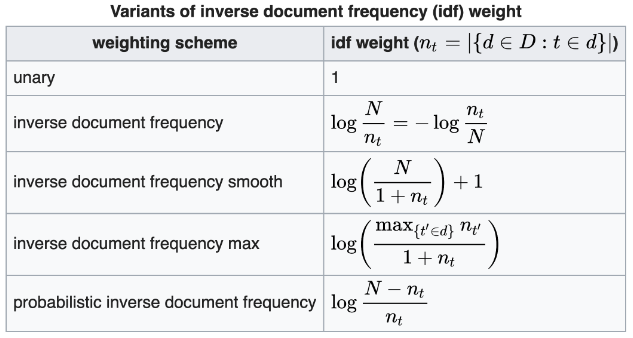

In [ ]:
corpus = ["Red Bull drops hint on F1 engine.",
          "Honda exits F1, leaving F1 partner Red Bull.",
          "Hamilton eyes record eighth F1 title.",
          "Aston Martin announces sponsor."]

In [ ]:
def get_unigram(corpus):
  tokens = []
  for sent in corpus:
    for punc in string.punctuation:
      sent = sent.replace(punc, '')
    tokens+=sent.lower().split()
  return list(set(tokens))

def text_tokenize(text):
  tokens = []
  for punc in string.punctuation:
    text = text.replace(punc, '')
  for pos in range(len(text.split())):
    uni_gram = text.split()[pos]
    tokens.append(uni_gram)
  return tokens

# View features (tokens).
import string
tokens = get_unigram(corpus)
tokens.sort()
print('Token length: ', len(tokens))
print('Tokens: ', tokens)

# View vocabulary dictionary.
print('Vocabulary length: ', len(dict(zip(tokens, range(len(tokens))))))
print("Vocabulary: ", dict(zip(tokens, range(len(tokens)))))

Token length:  20
Tokens:  ['announces', 'aston', 'bull', 'drops', 'eighth', 'engine', 'exits', 'eyes', 'f1', 'hamilton', 'hint', 'honda', 'leaving', 'martin', 'on', 'partner', 'record', 'red', 'sponsor', 'title']
Vocabulary length:  20
Vocabulary:  {'announces': 0, 'aston': 1, 'bull': 2, 'drops': 3, 'eighth': 4, 'engine': 5, 'exits': 6, 'eyes': 7, 'f1': 8, 'hamilton': 9, 'hint': 10, 'honda': 11, 'leaving': 12, 'martin': 13, 'on': 14, 'partner': 15, 'record': 16, 'red': 17, 'sponsor': 18, 'title': 19}


In [ ]:
# Summarizing the Encoded Texts
def tf_matrix(tokens, corpus):
  tf_matrix = []
  for sent in corpus:
    sent_token = text_tokenize(sent.lower())
    sent_token_dict = defaultdict(int)
    for t in tokens:
      if t in sent_token:
        sent_token_dict[t] += (1/len(sent_token))
      else:
        sent_token_dict[t] = 0
    sent_vec = list(sent_token_dict.values())
    tf_matrix.append(sent_vec)
  return tf_matrix

import pandas as pd
import numpy as np
from collections import defaultdict
tf_matrix = pd.DataFrame(np.array(tf_matrix(tokens, corpus)), columns = tokens, index = corpus)
tf_matrix

,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
Red Bull drops hint on F1 engine.,0.00,0.00,0.142857,0.142857,0.000000,0.142857,0.000,0.000000,0.142857,0.000000,0.142857,0.000,0.000,0.00,0.142857,0.000,0.000000,0.142857,0.00,0.000000
"Honda exits F1, leaving F1 partner Red Bull.",0.00,0.00,0.125000,0.000000,0.000000,0.000000,0.125,0.000000,0.125000,0.000000,0.000000,0.125,0.125,0.00,0.000000,0.125,0.000000,0.125000,0.00,0.000000
Hamilton eyes record eighth F1 title.,0.00,0.00,0.000000,0.000000,0.166667,0.000000,0.000,0.166667,0.166667,0.166667,0.000000,0.000,0.000,0.00,0.000000,0.000,0.166667,0.000000,0.00,0.166667
Aston Martin announces sponsor.,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.25,0.000000,0.000,0.000000,0.000000,0.25,0.000000


In [ ]:
def df_matrix(tokens, corpus):
  sent_token_dict = defaultdict(int)
  for t in tokens:
    sent_token_dict[t] = 0
    for doc in corpus:
      if t in text_tokenize(doc.lower()):
        sent_token_dict[t] += 1
  return sent_token_dict

import pandas as pd
import numpy as np
from collections import defaultdict
df_matrix = pd.DataFrame([df_matrix(tokens, corpus)])
df_matrix

,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
0,1,1,2,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,1,1


In [ ]:
idf_matrix = np.log(len(corpus)/df_matrix)
idf_matrix

,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
0,1.386294,1.386294,0.693147,1.386294,1.386294,1.386294,1.386294,1.386294,0.287682,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,0.693147,1.386294,1.386294


In [ ]:
pd.DataFrame(tf_matrix.to_numpy() * idf_matrix.to_numpy(), columns = tokens, index = corpus)

,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
Red Bull drops hint on F1 engine.,0.000000,0.000000,0.099021,0.198042,0.000000,0.198042,0.000000,0.000000,0.041097,0.000000,0.198042,0.000000,0.000000,0.000000,0.198042,0.000000,0.000000,0.099021,0.000000,0.000000
"Honda exits F1, leaving F1 partner Red Bull.",0.000000,0.000000,0.086643,0.000000,0.000000,0.000000,0.173287,0.000000,0.035960,0.000000,0.000000,0.173287,0.173287,0.000000,0.000000,0.173287,0.000000,0.086643,0.000000,0.000000
Hamilton eyes record eighth F1 title.,0.000000,0.000000,0.000000,0.000000,0.231049,0.000000,0.000000,0.231049,0.047947,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231049,0.000000,0.000000,0.231049
Aston Martin announces sponsor.,0.346574,0.346574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346574,0.000000,0.000000,0.000000,0.000000,0.346574,0.000000


Sklearn - TfidfVectorizer

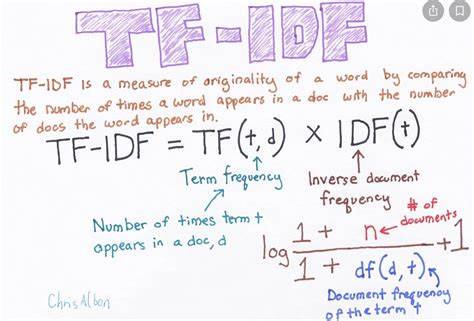

In [ ]:
%%time
# Use the default settings of TfidfVectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(corpus)

# View features (tokens).
print('Token length: ', len(vectorizer.get_feature_names_out()))
print('Tokens: ', vectorizer.get_feature_names_out())

# View vocabulary dictionary.
print('Vocabulary length: ', len(vectorizer.vocabulary_))
print("Vocabulary: ", vectorizer.vocabulary_)

# Summarizing the Encoded Texts
import pandas as pd
print(type(features))
pd.DataFrame(features.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus)

Token length:  20
Tokens:  ['announces' 'aston' 'bull' 'drops' 'eighth' 'engine' 'exits' 'eyes' 'f1'
 'hamilton' 'hint' 'honda' 'leaving' 'martin' 'on' 'partner' 'record'
 'red' 'sponsor' 'title']
Vocabulary length:  20
Vocabulary:  {'red': 17, 'bull': 2, 'drops': 3, 'hint': 10, 'on': 14, 'f1': 8, 'engine': 5, 'honda': 11, 'exits': 6, 'leaving': 12, 'partner': 15, 'hamilton': 9, 'eyes': 7, 'record': 16, 'eighth': 4, 'title': 19, 'aston': 1, 'martin': 13, 'announces': 0, 'sponsor': 18}
<class 'scipy.sparse._csr.csr_matrix'>
CPU times: user 5.12 ms, sys: 882 µs, total: 6.01 ms
Wall time: 5.88 ms


,announces,aston,bull,drops,eighth,engine,exits,eyes,f1,hamilton,hint,honda,leaving,martin,on,partner,record,red,sponsor,title
Red Bull drops hint on F1 engine.,0.0,0.0,0.331670,0.420681,0.000000,0.420681,0.000000,0.000000,0.268515,0.000000,0.420681,0.000000,0.000000,0.0,0.420681,0.000000,0.000000,0.331670,0.0,0.000000
"Honda exits F1, leaving F1 partner Red Bull.",0.0,0.0,0.300736,0.000000,0.000000,0.000000,0.381445,0.000000,0.486943,0.000000,0.000000,0.381445,0.381445,0.0,0.000000,0.381445,0.000000,0.300736,0.0,0.000000
Hamilton eyes record eighth F1 title.,0.0,0.0,0.000000,0.000000,0.430037,0.000000,0.000000,0.430037,0.274487,0.430037,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.430037,0.000000,0.0,0.430037
Aston Martin announces sponsor.,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000


In [ ]:
%%time
#using spaCy's tokenizer
import spacy
nlp = spacy.load('en_core_web_sm')

#Removing named-entity recognition nor dependency parsing to speed up the pipeline
unwanted_pipes = ["ner", "parser"]

#Removing punctuation and spaces (newlines), filter for tokens consisting of alphabetic characters, and return the lemma (require POS tagging).
def spacy_tokenizer(doc):
  with nlp.disable_pipes(*unwanted_pipes):
    return [t.lemma_ for t in nlp(doc) if \
            not t.is_punct and \
            not t.is_space and \
            t.is_alpha]

# Use the default settings of TfidfVectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, token_pattern = None)
features = vectorizer.fit_transform(corpus)

# View features (tokens).
print('Token length: ', len(vectorizer.get_feature_names_out()))
print('Tokens: ', vectorizer.get_feature_names_out())

# View vocabulary dictionary.
print('Vocabulary length: ', len(vectorizer.vocabulary_))
print("Vocabulary: ", vectorizer.vocabulary_)

# Summarizing the Encoded Texts
import pandas as pd
print(type(features))
pd.DataFrame(features.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus)

Token length:  19
Tokens:  ['announce' 'aston' 'bull' 'drop' 'eighth' 'engine' 'exit' 'eye'
 'hamilton' 'hint' 'honda' 'leave' 'martin' 'on' 'partner' 'record' 'red'
 'sponsor' 'title']
Vocabulary length:  19
Vocabulary:  {'red': 16, 'bull': 2, 'drop': 3, 'hint': 9, 'on': 13, 'engine': 5, 'honda': 10, 'exit': 6, 'leave': 11, 'partner': 14, 'hamilton': 8, 'eye': 7, 'record': 15, 'eighth': 4, 'title': 18, 'aston': 1, 'martin': 12, 'announce': 0, 'sponsor': 17}
<class 'scipy.sparse._csr.csr_matrix'>
CPU times: user 1.11 s, sys: 14.7 ms, total: 1.13 s
Wall time: 1.17 s


,announce,aston,bull,drop,eighth,engine,exit,eye,hamilton,hint,honda,leave,martin,on,partner,record,red,sponsor,title
Red Bull drops hint on F1 engine.,0.0,0.0,0.344315,0.436719,0.000000,0.436719,0.000000,0.000000,0.000000,0.436719,0.000000,0.000000,0.0,0.436719,0.000000,0.000000,0.344315,0.0,0.000000
"Honda exits F1, leaving F1 partner Red Bull.",0.0,0.0,0.344315,0.000000,0.000000,0.000000,0.436719,0.000000,0.000000,0.000000,0.436719,0.436719,0.0,0.000000,0.436719,0.000000,0.344315,0.0,0.000000
Hamilton eyes record eighth F1 title.,0.0,0.0,0.000000,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.447214,0.000000,0.0,0.447214
Aston Martin announces sponsor.,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000


In [ ]:
# Transform the query into a TF-IDF vector.
query = ["lunar orbit"]
query_tfidf = vectorizer.transform(query)

# Summarizing the Encoded Texts
import pandas as pd
pd.DataFrame(query_tfidf.toarray(), columns = vectorizer.get_feature_names_out(), index = query)

,announce,aston,bull,drop,eighth,engine,exit,eye,hamilton,hint,honda,leave,martin,on,partner,record,red,sponsor,title
lunar orbit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate the cosine similarities between the query and each document.
# We're calling flatten() here becaue cosine_similarity returns a list
# of lists and we just want a single list.
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(features, query_tfidf).flatten()
for i in range(len(corpus)):
  print(f"Doc {i+1}: {corpus[i]} vs Query: {query[0]}")
  print(f"Doc {i+1}: {features[i].toarray()[0]} vs Query: {query_tfidf.toarray()[0]}")
  print(f"==>Doc {i+1} vs Query: {cosine_similarities[i]}")

Doc 1: Red Bull drops hint on F1 engine. vs Query: lunar orbit
Doc 1: [0.         0.         0.34431452 0.43671931 0.         0.43671931
 0.         0.         0.         0.43671931 0.         0.
 0.         0.43671931 0.         0.         0.34431452 0.
 0.        ] vs Query: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
==>Doc 1 vs Query: 0.0
Doc 2: Honda exits F1, leaving F1 partner Red Bull. vs Query: lunar orbit
Doc 2: [0.         0.         0.34431452 0.         0.         0.
 0.43671931 0.         0.         0.         0.43671931 0.43671931
 0.         0.         0.43671931 0.         0.34431452 0.
 0.        ] vs Query: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
==>Doc 2 vs Query: 0.0
Doc 3: Hamilton eyes record eighth F1 title. vs Query: lunar orbit
Doc 3: [0.        0.        0.        0.        0.4472136 0.        0.
 0.4472136 0.4472136 0.        0.        0.        0.        0.
 0.        0.4472136 0.        0.        0.4472136] vs Query: [0. 0

In [ ]:
#the top k documents with the highest cosine similarities
import numpy as np
def top_k(arr, k):
  kth_largest = (k + 1) * -1
  return np.argsort(arr)[:kth_largest:-1]

# So for our query above, these are the top five documents.
cosine_similarities = cosine_similarity(features, features[0]).flatten()
top_related_indices = top_k(cosine_similarities, 3)
for i in top_related_indices:
  print(f"Doc {i+1}: {corpus[i]} vs Doc 1: {corpus[0]}")
  print(f"Doc {i+1}: {features[i].toarray()[0]} vs Doc 1: {features[0].toarray()[0]}")
  print(f"==>Doc {i+1} vs Doc 1: {cosine_similarities[i]}")

Doc 1: Red Bull drops hint on F1 engine. vs Doc 1: Red Bull drops hint on F1 engine.
Doc 1: [0.         0.         0.34431452 0.43671931 0.         0.43671931
 0.         0.         0.         0.43671931 0.         0.
 0.         0.43671931 0.         0.         0.34431452 0.
 0.        ] vs Doc 1: [0.         0.         0.34431452 0.43671931 0.         0.43671931
 0.         0.         0.         0.43671931 0.         0.
 0.         0.43671931 0.         0.         0.34431452 0.
 0.        ]
==>Doc 1 vs Doc 1: 1.0000000000000002
Doc 2: Honda exits F1, leaving F1 partner Red Bull. vs Doc 1: Red Bull drops hint on F1 engine.
Doc 2: [0.         0.         0.34431452 0.         0.         0.
 0.43671931 0.         0.         0.         0.43671931 0.43671931
 0.         0.         0.43671931 0.         0.34431452 0.
 0.        ] vs Doc 1: [0.         0.         0.34431452 0.43671931 0.         0.43671931
 0.         0.         0.         0.43671931 0.         0.
 0.         0.43671931 0.  

###Inverted_index

In [ ]:
# Step 1: Tokenize the documents
# Convert each document to lowercase and split it into words
def doc_tokenize(corpus):
  tokens = []
  for doc in corpus:
    for punc in string.punctuation:
      doc = doc.replace(punc, '')
    tokens += doc.lower().split()
  # Combine the tokens into a list of unique terms
  terms = list(set(tokens))
  return terms

# Define the documents
document1 = "The quick brown fox jumped over the lazy dog."
document2 = "The lazy dog slept in the sun."
corpus = [document1, document2]
doc_tokenize(corpus)

['over',
 'jumped',
 'brown',
 'lazy',
 'slept',
 'quick',
 'fox',
 'the',
 'in',
 'sun',
 'dog']

In [ ]:
# Step 2: Build the inverted index
def inverted_index(terms, corpus):
  # Create an empty dictionary to store the inverted index
  inverted_index = {}
  # For each term, find the documents that contain it
  for term in terms:
    documents = []
    for idx, doc in enumerate(corpus):
      for punc in string.punctuation:
        doc = doc.replace(punc, '')
      if term in doc.lower().split():
        documents.append(idx)
    inverted_index[term] = documents
  return inverted_index

terms = doc_tokenize(corpus)
inverted_index(terms, corpus)

{'over': [0],
 'jumped': [0],
 'brown': [0],
 'lazy': [0, 1],
 'slept': [1],
 'quick': [0],
 'fox': [0],
 'the': [0, 1],
 'in': [1],
 'sun': [1],
 'dog': [0, 1]}

In [ ]:
# Step 3: Print the inverted index
terms = doc_tokenize(corpus)
inverted_idx = inverted_index(terms, corpus)
for term, doc_idx in inverted_idx.items():
  print(term, "->", ", ".join([corpus[idx] for idx in doc_idx]))

over -> The quick brown fox jumped over the lazy dog.
jumped -> The quick brown fox jumped over the lazy dog.
brown -> The quick brown fox jumped over the lazy dog.
lazy -> The quick brown fox jumped over the lazy dog., The lazy dog slept in the sun.
slept -> The lazy dog slept in the sun.
quick -> The quick brown fox jumped over the lazy dog.
fox -> The quick brown fox jumped over the lazy dog.
the -> The quick brown fox jumped over the lazy dog., The lazy dog slept in the sun.
in -> The lazy dog slept in the sun.
sun -> The lazy dog slept in the sun.
dog -> The quick brown fox jumped over the lazy dog., The lazy dog slept in the sun.


###Precision_and_recall

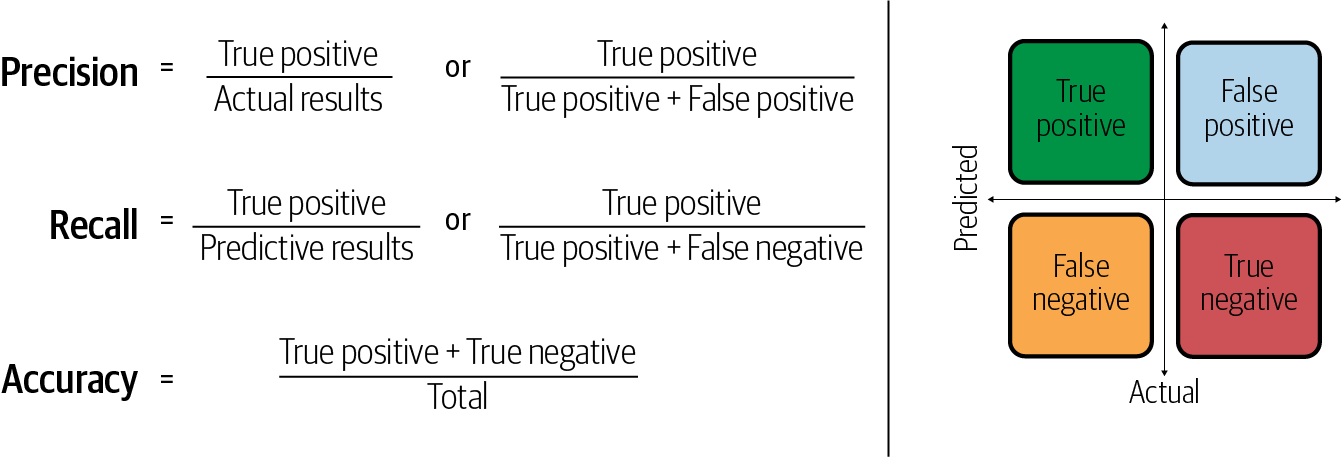

###Okapi_BM25

$score(D, Q) = ∑_{i=1}^nIDF(q_i)⋅\frac{f(q_i, D)⋅(k_1+1)}{f(q_i, D)+k_1⋅(1-b+b⋅\frac{|D|}{avgdl})}$

where:
- $D$: a document
- $Q$: a given query (containing keywords $q_1, q_2,...,q_n$)
- $score(D, Q)$: the BM25 score of a document D
- $f(q_i, D)$: the number of times that the keyword $q_i$ occurs in the document D
- $k_1$: free parameter, $k_1 ∈ [1.2, 2.0]$
- $b$: free parameter, $b=0.75$.  BM11 (
$𝑏=1$) and BM15 ($b=0$)
- $|D|$: the length of the document D in words
- $avgdl$: the average document length in the text collection
- $IDF(q_i)$: Inverse Document Frequency weight of the query term $q_i$. <Br>
$IDF(q_i)=ln(\frac{N-n(q_i)+0.5}{n(q_i)+0.5}+1)$
, where $N$: the total number of documents in the collection, $n(q_i)$ the number of documents containing $q_i$

In [ ]:
#Text collection
corpus = [
    'Human machine interface for lab abc computer applications',
    'A survey of user opinion of computer system response time',
    'The EPS user interface management system',
    'System and human system engineering testing of EPS',
    'Relation of user perceived response time to error measurement',
    'The generation of random binary unordered trees',
    'The intersection graph of paths in trees',
    'Graph minors IV Widths of trees and well quasi ordering',
    'Graph minors A survey'
]

# build a word-frequency dictionary
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
texts = [[word for word in document.lower().split() if word not in stopwords]for document in corpus]
for t in texts:
  print('tokenized_text: ', t)

word_count_dict = {}
for text in texts:
    for token in text:
        word_count = word_count_dict.get(token, 0) + 1
        word_count_dict[token] = word_count
print('word_count_dict: ', word_count_dict)

#keep only tokens with word-frequence > 1
texts = [[token for token in text if word_count_dict[token] > 1] for text in texts]
for t in texts:
  print('tokenized_text: ', t)

tokenized_text:  ['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications']
tokenized_text:  ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time']
tokenized_text:  ['eps', 'user', 'interface', 'management', 'system']
tokenized_text:  ['system', 'human', 'system', 'engineering', 'testing', 'eps']
tokenized_text:  ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement']
tokenized_text:  ['generation', 'random', 'binary', 'unordered', 'trees']
tokenized_text:  ['intersection', 'graph', 'paths', 'trees']
tokenized_text:  ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering']
tokenized_text:  ['graph', 'minors', 'survey']
word_count_dict:  {'human': 2, 'machine': 1, 'interface': 2, 'lab': 1, 'abc': 1, 'computer': 2, 'applications': 1, 'survey': 2, 'user': 3, 'opinion': 1, 'system': 4, 'response': 2, 'time': 2, 'eps': 2, 'management': 1, 'engineering': 1, 'testing': 1, 'relation': 1, 'perceived': 1, 'error': 1, 'measu

In [ ]:
def tokenizer(corpus):
  # build a word-frequency dictionary
  stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
  texts = [[word for word in document.lower().split() if word not in stopwords]for document in corpus]
  word_count_dict = {}
  for text in texts:
      for token in text:
          word_count = word_count_dict.get(token, 0) + 1
          word_count_dict[token] = word_count
  #keep only tokens with word-frequence > 1
  texts = [[token for token in text if word_count_dict[token] > 1] for text in texts]
  return texts

In [ ]:
corpus = [
    'Human machine interface for lab abc computer applications',
    'A survey of user opinion of computer system response time',
    'The EPS user interface management system',
    'System and human system engineering testing of EPS',
    'Relation of user perceived response time to error measurement',
    'The generation of random binary unordered trees',
    'The intersection graph of paths in trees',
    'Graph minors IV Widths of trees and well quasi ordering',
    'Graph minors A survey'
]

k1 = 1.5
b = 0.75
tokenized_corpus = tokenizer(corpus)
tf = [] #f(Q,D) : the number of times that Q occurs in the document D
df = {} #n(Q)  the number of documents containing Q
idf = {} #IDF(Q) : Inverse Document Frequency weight of Q
doc_len = [] #|D|: the length of the document D in words
corpus_size = 0 #N : the total number of documents in the collection

import math
for document in tokenized_corpus:
    corpus_size += 1
    doc_len.append(len(document))

    #compute f(qi,D)
    frequencies = {}
    for term in document:
        term_count = frequencies.get(term, 0) + 1
        frequencies[term] = term_count
    tf.append(frequencies)

    #compute n(qi)
    for term, _ in frequencies.items():
        df_count = df.get(term, 0) + 1
        df[term] = df_count

#avgdl : the average document length in the text collection
avg_doc_len = sum(doc_len) / corpus_size

print(f'corpus: {len(tokenized_corpus)}, {tokenized_corpus}')
print(f'f(Q,D): {len(tf)}, {tf}')
print(f'|D|: {len(doc_len)}, {doc_len}')
print(f'N: {corpus_size}')
print(f'average document length: {avg_doc_len}')

corpus: 9, [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
f(Q,D): 9, [{'human': 1, 'interface': 1, 'computer': 1}, {'survey': 1, 'user': 1, 'computer': 1, 'system': 1, 'response': 1, 'time': 1}, {'eps': 1, 'user': 1, 'interface': 1, 'system': 1}, {'system': 2, 'human': 1, 'eps': 1}, {'user': 1, 'response': 1, 'time': 1}, {'trees': 1}, {'graph': 1, 'trees': 1}, {'graph': 1, 'minors': 1, 'trees': 1}, {'graph': 1, 'minors': 1, 'survey': 1}]
|D|: 9, [3, 6, 4, 4, 3, 1, 2, 3, 3]
N: 9
average document length: 3.2222222222222223


$IDF(q_i)=ln(\frac{N-n(q_i)+0.5}{n(q_i)+0.5}+1)$

In [ ]:
#compute IDF(qi)
for term, freq in df.items():
    idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

print(f'n(Q): {len(df)}, {df}')
print(f'IDF(Q): {len(idf)}, {idf}')

n(Q): 12, {'human': 2, 'interface': 2, 'computer': 2, 'survey': 2, 'user': 3, 'system': 3, 'response': 2, 'time': 2, 'eps': 2, 'trees': 3, 'graph': 3, 'minors': 2}
IDF(Q): 12, {'human': 1.3862943611198906, 'interface': 1.3862943611198906, 'computer': 1.3862943611198906, 'survey': 1.3862943611198906, 'user': 1.0498221244986776, 'system': 1.0498221244986776, 'response': 1.3862943611198906, 'time': 1.3862943611198906, 'eps': 1.3862943611198906, 'trees': 1.0498221244986776, 'graph': 1.0498221244986776, 'minors': 1.3862943611198906}


$score(D, Q) = ∑_{i=1}^nIDF(q_i)⋅\frac{f(q_i, D)⋅(k_1+1)}{f(q_i, D)+k_1⋅(1-b+b⋅\frac{|D|}{avgdl})}$



In [ ]:
query = 'The intersection of graph survey and trees'
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
tokenized_query = [word for word in query.lower().split() if word not in stopwords]
print(f'Query: {query}  => tokenized_query: {tokenized_query}')

scores = []
for index in range(corpus_size):
  score = 0.0
  frequencies = tf[index]
  for term in tokenized_query:
      if term not in frequencies:
          continue
      freq = frequencies[term]
      numerator = idf[term] * freq * (k1 + 1) #IDF(qi) * f(qi,D) * (k1+1)
      denominator = freq + k1 * (1 - b + b * doc_len[index] / avg_doc_len) #f(qi,D) + k1 * (1 − b + b * |D| / avgdl)
      score += (numerator / denominator) #score(D,Q)
  scores.append(score)

for score, doc in zip(scores, corpus):
    score = round(score, 3)
    print(str(score) + '\t' + doc)

Query: The intersection of graph survey and trees  => tokenized_query: ['intersection', 'graph', 'survey', 'trees']
0.0	Human machine interface for lab abc computer applications
0.999	A survey of user opinion of computer system response time
0.0	The EPS user interface management system
0.0	System and human system engineering testing of EPS
0.0	Relation of user perceived response time to error measurement
1.522	The generation of random binary unordered trees
2.532	The intersection graph of paths in trees
2.167	Graph minors IV Widths of trees and well quasi ordering
2.514	Graph minors A survey


##OUT OF VOCABULARY

In [ ]:
corpus = [
  "Red Bull drops hint on F1 engine.",
  "Honda exits F1, leaving F1 partner Red Bull.",
  "Hamilton eyes record eighth F1 title.",
  "Aston Martin announces sponsor."
]

In [ ]:
#the top k documents with the highest cosine similarities
import numpy as np
def top_k(arr, k):
  kth_largest = (k + 1) * -1
  return np.argsort(arr)[:kth_largest:-1]

Bag of Words

In [ ]:
# Create a tokenizer callback using spaCy under the hood. Here, we tokenize
# the passed-in text and return the tokens, filtering out punctuation.
import spacy
nlp = spacy.load('en_core_web_sm')
def spacy_tokenizer(doc):
  return [t.text for t in nlp(doc) if not t.is_punct]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, token_pattern=None, lowercase=False, binary=True, ngram_range=(1,2))
bigrams = vectorizer.fit_transform(corpus)
for sent, vec in zip(corpus, bigrams.toarray()):
  print(f'Sent: {sent} \n=> sent_vec: {vec}')

#Query
s = ["Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes carrying dengue fever."]
new_bow = vectorizer.transform(s)
for sent, vec in zip(s, new_bow.toarray()):
  print(f'Sent: {sent} \n=> sent_vec: {vec}')

Sent: Red Bull drops hint on F1 engine. 
=> sent_vec: [0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0]
Sent: Honda exits F1, leaving F1 partner Red Bull. 
=> sent_vec: [0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 0 0]
Sent: Hamilton eyes record eighth F1 title. 
=> sent_vec: [0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 1]
Sent: Aston Martin announces sponsor. 
=> sent_vec: [1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Sent: Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes carrying dengue fever. 
=> sent_vec: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# So for our query above, these are the top five documents.
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(bigrams, new_bow).flatten()
top_related_indices = top_k(cosine_similarities, 3)
for i in top_related_indices:
  print(f"Doc {i+1}: {corpus[i]} vs Query: {s[0]}")
  print(f"Doc {i+1}: {bigrams[i].toarray()[0]} vs Query: {new_bow[0].toarray()[0]}")
  print(f"==>Doc {i+1} vs Doc 1: {cosine_similarities[i]}")

Doc 4: Aston Martin announces sponsor. vs Query: Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes carrying dengue fever.
Doc 4: [1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0] vs Query: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
==>Doc 4 vs Doc 1: 0.0
Doc 3: Hamilton eyes record eighth F1 title. vs Query: Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes car

TF-IDF

In [ ]:
# Use the default settings of TfidfVectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(corpus)
# Summarizing the Encoded Texts
for sent, vec in zip(corpus, features.toarray()):
  print(f'Sent: {sent} \n=> sent_vec: {vec}')

#Query
s = ["Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes carrying dengue fever."]
new_bow = vectorizer.transform(s)
for sent, vec in zip(s, new_bow.toarray()):
  print(f'Sent: {sent} \n=> sent_vec: {vec}')

Sent: Red Bull drops hint on F1 engine. 
=> sent_vec: [0.         0.         0.33166972 0.42068099 0.         0.42068099
 0.         0.         0.26851522 0.         0.42068099 0.
 0.         0.         0.42068099 0.         0.         0.33166972
 0.         0.        ]
Sent: Honda exits F1, leaving F1 partner Red Bull. 
=> sent_vec: [0.         0.         0.30073588 0.         0.         0.
 0.38144533 0.         0.48694323 0.         0.         0.38144533
 0.38144533 0.         0.         0.38144533 0.         0.30073588
 0.         0.        ]
Sent: Hamilton eyes record eighth F1 title. 
=> sent_vec: [0.         0.         0.         0.         0.43003652 0.
 0.         0.43003652 0.27448674 0.43003652 0.         0.
 0.         0.         0.         0.         0.43003652 0.
 0.         0.43003652]
Sent: Aston Martin announces sponsor. 
=> sent_vec: [0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.
 0.5 0. ]
Sent: Teenagers take aerial shots of their neighbourho

In [ ]:
# So for our query above, these are the top five documents.
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(features, new_bow).flatten()
top_related_indices = top_k(cosine_similarities, 3)
for i in top_related_indices:
  print(f"Doc {i+1}: {corpus[i]} vs Query: {s[0]}")
  print(f"Doc {i+1}: {features[i].toarray()[0]} vs Query: {new_bow[0].toarray()[0]}")
  print(f"==>Doc {i+1} vs Doc 1: {cosine_similarities[i]}")

Doc 4: Aston Martin announces sponsor. vs Query: Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes carrying dengue fever.
Doc 4: [0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.
 0.5 0. ] vs Query: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
==>Doc 4 vs Doc 1: 0.0
Doc 3: Hamilton eyes record eighth F1 title. vs Query: Teenagers take aerial shots of their neighbourhood using digital cameras sitting in old bottles which are launched via kites - a common toy for children living in the favelas. They then use GPS-enabled smartphones to take pictures of specific danger points - such as rubbish heaps, which can become a breeding ground for mosquitoes carrying dengue fever.
Do